In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import pickle

# Preparing Dataset

### The Datasets we have used is :


* GoodReads data       (link : https://www.kaggle.com/jealousleopard/goodreadsbooks)
* UCSD data       (link : https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home?authuser=0)

## About the data

#### GoodReads data 
GoodReads data is a very popular Dataset of books in Kaggle  , it was made from the Goodreads website which is the world's largest site for readers and book recommendations. It contains the following columns.

In [11]:
Good_reads=pd.read_csv('data/GoodReads_books.csv',error_bad_lines = False)
Good_reads.drop_duplicates(subset=['title'], inplace=True)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [12]:
goodreads_cols=Good_reads.columns.to_list()
goodreads_cols

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

### Colums Description:

* bookID :This is the GoodReads book id
* title : Title of the book
* authors : The primary author of the book 
* average_rating : The Avegare rating of the book
* ISBN ISBN(10) number: tells the information about a book - such as edition and publisher
* ISBN 13:  The new format for ISBN, implemented in 2007. 13 digits* language_code Tells the language for the books
* language_code:  Tells the language for the books
* Num_pages: The number of pages in the book
* Ratings_count : The total number of ratings the book recieved in GoodReads
* text_reviews_count : The tital number of reviews the book recieved in GoodReads
* publication_date: The date book was published in 
* publisher: The publisher of the paper back version of the book







In [13]:
Good_reads.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


Even though the data contains detailed information, it is missing information like description, the number of awards, and Genre which are essential features for both the recommendation system and Book to the movie prediction model.

In [1]:
from Scraper_files.Datascraper import get_data

In [16]:
ids=Good_reads['bookID'].to_list() 

In [167]:
'''count=0
try:
    scrape_df=pd.read_csv('data/GoddReads_desc.csv')
    title=scrape_df['title'].to_list()
    description=scrape_df['description'].to_list()
    awards=scrape_df['awards'].to_list()
    genre=scrape_df['genre'].to_list()
    book_id=scrape_df['book_id'].to_list()
except Exception as e:
    print(e)
    title=[]
    description=[]
    awards=[]
    genre=[]
    book_id=[]

for items in ids:
    count+=1
    exc=1
    if items in book_id:
        continue
    else:
        try:
            book_data=get_data(f'https://www.goodreads.com/book/show/{items}')
        except Exception as e:
            if exc==1:
                pass
            print(e)              
        title.append(book_data['title'])
        description.append(book_data['description'])
        awards.append(book_data['awards'])
        genre.append(book_data['genre'])
        book_id.append(items)
        print(book_data['title'],"_ done_",items)
    if count%10==0:
        new_df=pd.DataFrame({'title':title,'description':description,'awards':awards,'genre':genre,'book_id':book_id})
        new_df.to_csv('data/GoddReads_desc.csv')
        print("saved_csv_entryno_",items)'''

'count=0\ntry:\n    scrape_df=pd.read_csv(\'data/GoddReads_desc.csv\')\n    title=scrape_df[\'title\'].to_list()\n    description=scrape_df[\'description\'].to_list()\n    awards=scrape_df[\'awards\'].to_list()\n    genre=scrape_df[\'genre\'].to_list()\n    book_id=scrape_df[\'book_id\'].to_list()\nexcept Exception as e:\n    print(e)\n    title=[]\n    description=[]\n    awards=[]\n    genre=[]\n    book_id=[]\n\nfor items in ids:\n    count+=1\n    exc=1\n    if items in book_id:\n        continue\n    else:\n        try:\n            book_data=get_data(f\'https://www.goodreads.com/book/show/{items}\')\n        except Exception as e:\n            if exc==1:\n                pass\n            print(e)              \n        title.append(book_data[\'title\'])\n        description.append(book_data[\'description\'])\n        awards.append(book_data[\'awards\'])\n        genre.append(book_data[\'genre\'])\n        book_id.append(items)\n        print(book_data[\'title\'],"_ done_",items)

The best way to get those other data is directly from the source, so for adding that information we build a scraper by using python's Beautifulsoup library to get that information directly from the Goodreads website. We import the Scraper from Datascraper.py

#### Description of the scraper:
* The Data scraper will search for a GoddReads_desc.csv, if it finds one, it will read it will take the columns as list and will keep on appending to that list or will create an empty list for the features. (This is to avoid scraping the entries that has already been scraped)
* loop over all the ids and will use it to create the URL for the book.
###### URL pattern : https://www.goodreads.com/book/show/(book_id)
* then scraped the data and adds it to the lists.
* then creates a new data frame and adds the data as new columns.
* saves it to a CSV GoddReads_desc.csv after every 10 data.

In [18]:
GoddReads_desc=pd.read_csv('data/GoddReads_desc.csv',index_col=0,error_bad_lines = False)

In [19]:
GoddReads_desc.head()

,title,description,awards,genre,book_id
0,HarryPotterandtheHalf-BloodPrince,The war against Voldemort is not going well; e...,3,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",1
1,HarryPotterandtheOrderofthePhoenix,There is a door at the end of a silent corrido...,9,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",2
2,HarryPotterandtheChamberofSecrets,The Dursleys were so mean and hideous that sum...,7,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4
3,HarryPotterandthePrisonerofAzkaban,Harry Potter's third year at Hogwarts is full ...,13,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",5
4,"HarryPotterBoxedSet,Books1-5(HarryPotter,#1-5)",NaN,0,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",8


In [20]:
GoddReads_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10220 entries, 0 to 10219
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        10220 non-null  object
 1   description  8200 non-null   object
 2   awards       10220 non-null  int64 
 3   genre        10220 non-null  object
 4   book_id      10220 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 479.1+ KB


In [21]:
GoddReads_desc.dropna(inplace=True)
GoddReads_desc=GoddReads_desc[['book_id','description','awards','genre']]
Good_reads.rename(columns={"bookID": "book_id"},inplace=True)

There are some entries whos description the scraper had failed to collect, so we can drop those entries, and as we have the book id, we don't need the book title, and we renamed the book to book_id to merge the data frames

In [46]:
Good_reads_main = pd.merge(Good_reads, GoddReads_desc,how="inner", on=['book_id'])

In [47]:
Good_reads_main.head(1)

,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,description,awards,genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy..."


In [85]:
def get_genre(genre):
    if len(genre)>3:
        return genre.strip("][").split(",")[0]
    else:
        return "not_given"
Good_reads_main['genre_cleaned']=Good_reads_main['genre'].apply(lambda x: get_genre(x))

The other columns are ok, but the genre columns is a list of the sorted list of genres, with the first one being the most related so we are only keeping the first element

In [42]:
movies_df=pd.read_csv("data/book_to_movies_ids.csv")
movies_df=movies_df[['book_id','Movie']]

In [51]:
print(movies_df.shape)
movies_df.head()

(2321, 2)


,book_id,Movie
0,6892870,yes
1,8128,yes
2,12067,yes
3,31122,yes
4,498153,yes


All the data are ok, now but we are still missing the movie column which ha the value of "yes" if the book was turned into movies "No" otherwise .for that we scraped the Wikipedia page for movies from non-fiction works. and took only the ones that match with the book title. Then we merged them with our dataset using the book id. But unfortunately only 403 books matched, we have to get more data from other 
Wiki pedia url: https://en.wikipedia.org/wiki/List_of_non-fiction_works_made_into_feature_films

In [83]:
Good_reads_main=pd.merge(Good_reads_main, movies_df,how='left', on='book_id')
Good_reads_main=pd.read_csv('data/GoodReads_main.csv')

In [84]:
Good_reads_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8294 entries, 0 to 8293
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8294 non-null   int64  
 1   Unnamed: 0.1        8294 non-null   int64  
 2   book_id             8294 non-null   int64  
 3   title               8294 non-null   object 
 4   authors             8294 non-null   object 
 5   average_rating      8294 non-null   float64
 6   isbn                8294 non-null   object 
 7   isbn13              8294 non-null   int64  
 8   language_code       8294 non-null   object 
 9     num_pages         8294 non-null   int64  
 10  ratings_count       8294 non-null   int64  
 11  text_reviews_count  8294 non-null   int64  
 12  publication_date    8294 non-null   object 
 13  publisher           8294 non-null   object 
 14  description         8294 non-null   object 
 15  awards              8294 non-null   int64  
 16  genre 

In [54]:
Good_reads_main.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [55]:
Good_reads_main.head(2)

,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,description,awards,genre,genre_cleaned,Movie
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",'Fantasy',yes
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,There is a door at the end of a silent corrido...,9,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",'Fantasy',NaN


This is our current dataset, but we need don't have many books that were turned into movies.

## Movies Data

#### This is our current dataset, but we need don't have many books that were turned into movies. For that, we scraped some book data directly from GoodReads of books that were turned into movies

##### To get the data we scraped data from two pages 
* https://www.goodreads.com/list/show/429.The_BOOK_was_BETTER_than_the_MOVIE
* https://www.goodreads.com/list/show/104.The_MOVIE_was_BETTER_than_the_BOOK

##### The code used to scrape the data of the books that were made into movies was the same as the code for collecting the description. Details explanation of the code is given in "Scraper_files/Scraping_Movie_Data.ipnb". the code returns a data frame of about 2000 books that were turned into movies. That data frame is then saved into GoodReads_Movies_from_book.csv.

In [71]:
Good_reads_main.head(1)

,book_id,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,description,awards,genre,genre_cleaned,Movie
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",'Fantasy',yes


As we dont need columns isbn and isbn13 because of being just ids, we can drop them.

In [86]:
Good_reads_main.drop(["isbn","isbn13",'genre'],axis=1,inplace=True)

In [73]:
Good_reads_movies=pd.read_csv('data/GoodReads_Movies_from_book.csv')

In [74]:
Good_reads_movies.drop(["Unnamed: 0"],axis=1,inplace=True)

In [76]:
print(Good_reads_movies.shape)
Good_reads_movies.head(1)

(1960, 14)


,title,description,awards,genre,book_id,language_code,num_pages,author,number_of_ratings,rating,publisher,year,text_reviews_count,Movie
0,TheGirlWhoKickedtheHornet'sNest,The stunning third and final novel in Stieg La...,4,['Fiction'],6892870,English,566pages,Stieg Larsson,643854,4.22,Knopf,May23rd2010,29024,yes


In [87]:
Good_reads_main.rename(columns={'  num_pages': "num_pages", "authors": "author", "ratings_count": "number_of_ratings", "average_rating": "rating", "publication_date": "year","genre_cleaned": "genre"},inplace=True)
Good_reads_joined=pd.concat([Good_reads_main,Good_reads_movies])

Now we are going to concatenate the two dataframes so for that we renamed tha columns to match each other 

In [92]:
Good_reads_joined.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1 , inplace=True)

In [94]:
Good_reads_joined.head(1)

,book_id,title,author,rating,language_code,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,'Fantasy',yes


In [95]:
Good_reads_joined.to_csv('data/GoodReads_final.csv')

In [96]:
Good_reads_joined = pd.read_csv('data/GoodReads_final.csv',index_col=)

In [97]:
Good_reads_joined.shape

(10254, 14)

In [99]:
Good_reads_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10254 entries, 0 to 1959
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             10254 non-null  int64  
 1   title               10254 non-null  object 
 2   author              10254 non-null  object 
 3   rating              10254 non-null  float64
 4   language_code       10253 non-null  object 
 5   num_pages           10254 non-null  object 
 6   number_of_ratings   10254 non-null  int64  
 7   text_reviews_count  10254 non-null  object 
 8   year                10225 non-null  object 
 9   publisher           10254 non-null  object 
 10  description         9932 non-null   object 
 11  awards              10254 non-null  int64  
 12  genre               10254 non-null  object 
 13  Movie               2363 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.2+ MB


In [101]:
Good_reads_joined.head(1)

,book_id,title,author,rating,language_code,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3,'Fantasy',yes


In [102]:
Good_reads_joined.tail(1)

,book_id,title,author,rating,language_code,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie
1959,652855,EddieandtheCruisers,P.F. Kluge,3.9,English,260pages,244,52,April1st1999,Kenyon College,NaN,0,['Fiction'],yes


Now time of a bit of Data cleaning , joining the movie dataset changed the formatting a little bit which neeeds to be fixed

* As Genre column consist of arrays of a single element e have to get the text only .

In [103]:
def clean_genre(genre):
    if"]" in genre:
        genre=genre.strip("][")
    if "'" in genre:
        genre=genre.strip("'")
    return genre

In [104]:
Good_reads_joined['genre']=Good_reads_joined['genre'].apply(lambda x :clean_genre(x) )

In [105]:
Good_reads_joined['genre'].tail(1)

1959    Fiction
Name: genre, dtype: object

* we just need the number of pages so the column values should be an integer

In [107]:
def clean_pages(page):
    if "pages" in page:
        page=page.replace("pages","")
    elif "Unavailable" in page:
        page=0
    return int(page)

In [108]:
Good_reads_joined['num_pages']=Good_reads_joined['num_pages'].apply(lambda x :clean_pages(x) )

In [115]:
Good_reads_joined=Good_reads_joined.drop_duplicates(subset=['book_id'])# droppinf duplicate entries

<AxesSubplot:xlabel='genre', ylabel='count'>

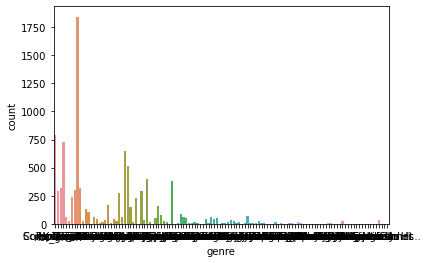

In [42]:
sns.countplot(Good_reads_joined.genre)

There are too many genres that required 120 to be exact and they can be grouped to reduce them which will be easier to use.

In [110]:
Good_reads_joined.genre.value_counts()

Fiction             1842
Fantasy              790
Nonfiction           727
Classics             650
Mystery              517
                    ... 
Jewellery              1
Asian Literature       1
Lds                    1
Amish                  1
Sports and Games       1
Name: genre, Length: 120, dtype: int64

In [111]:

s = Good_reads_joined['genre'].value_counts()
Good_reads_joined['genre'] = np.where(Good_reads_joined['genre'].isin(s.index[s >= 200]), Good_reads_joined['genre'], 'Other')

* To group them together we converted all genres with less than 200 entries to a genre "Others"

<AxesSubplot:xlabel='genre', ylabel='count'>

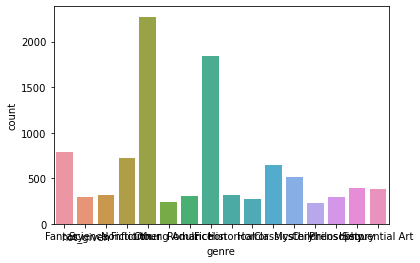

In [112]:
sns.countplot(Good_reads_joined.genre)

In [116]:
Good_reads_joined.shape

(9851, 14)

Currently, we have only 9851 books, which is not a big dataset, and making a recommendation system requires a lot of data than that. We will add some more data to it, from the UCSD book graph. The datasets were collected in late 2017 from goodreads.com, where we only scraped users' public shelves, i.e. everyone can see it on the web without login. User IDs and review IDs are anonymized.

### UCSD


#### Reference
* Mengting Wan, Julian McAuley, "Item Recommendation on Monotonic Behavior Chains", in RecSys'18.  [bibtex]
* Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora", in ACL'19. [bibtex]

In [47]:

df_children=pd.read_csv('genre_wise/children_book.csv')
df_comic_book=pd.read_csv('genre_wise/comic_book.csv')
df_fantasy_paranormal_book=pd.read_csv('genre_wise/fantasy_paranormal_book.csv')
df_history_biography_book=pd.read_csv('genre_wise/history_biography_book.csv')
df_mystery_thriller_crime_book=pd.read_csv('genre_wise/mystery_thriller_crime_book.csv')
df_poetry_book=pd.read_csv('genre_wise/poetry_book.csv')
df_romance_book=pd.read_csv('genre_wise/romance_book.csv')
df_young_adult_book=pd.read_csv('genre_wise/young_adult_book.csv')

In [48]:
df_children.drop('Unnamed: 0',axis=1,inplace=True)
df_comic_book.drop('Unnamed: 0',axis=1,inplace=True)
df_fantasy_paranormal_book.drop('Unnamed: 0',axis=1,inplace=True)
df_history_biography_book.drop('Unnamed: 0',axis=1,inplace=True)
df_mystery_thriller_crime_book.drop('Unnamed: 0',axis=1,inplace=True)
df_poetry_book.drop('Unnamed: 0',axis=1,inplace=True)
df_romance_book.drop('Unnamed: 0',axis=1,inplace=True)
df_young_adult_book.drop('Unnamed: 0',axis=1,inplace=True)

* Each data frame is a list of books of a fixed genre but the CSV files are too large to add it to the repository. To make ai a balanced dataset from all the genres we took a random sample of 2000 books from each data frame and concatenated them. So that there are 16000 entries in total but there are a lot of duplicate entries in the ad a lot of books have more than one genre. so we will remove duplicate entries from them which will leave us with 8368 entries

In [49]:
df_children=df_children.sample(n=2000)
df_comic_book=df_comic_book.sample(n=2000)
df_fantasy_paranormal_book=df_fantasy_paranormal_book.sample(n=2000)
df_history_biography_book=df_history_biography_book.sample(n=2000)
df_mystery_thriller_crime_book=df_mystery_thriller_crime_book.sample(n=2000)
df_poetry_book=df_poetry_book.sample(n=2000)
df_romance_book=df_romance_book.sample(n=2000)
df_young_adult_book=df_young_adult_book.sample(n=2000)
df_ucd=pd.concat([df_children,df_comic_book,df_fantasy_paranormal_book,df_history_biography_book,
           df_mystery_thriller_crime_book,df_poetry_book,df_romance_book,df_young_adult_book])

In [51]:
df_ucd.dropna(inplace=True)
##removing values with null columns which will leave 8368 entries , which is about half 

In [52]:
df_ucd.to_csv('data/second_df.csv')

In [126]:
UCSD_data=pd.read_csv('data/second_df.csv',index_col=0)

In [127]:
UCSD_data.shape

(8368, 18)

In [128]:
UCSD_data.head(2)

,isbn,text_reviews_count,country_code,average_rating,similar_books,description,authors,publisher,num_pages,publication_day,isbn13,publication_month,publication_year,image_url,book_id,ratings_count,title,genre
9952,0545103711,29,US,4.10,"['6907159', '7257860', '7381399', '1061387', '...","Enter the world of Geronimo Stilton, where ano...","[{'author_id': '53793', 'role': ''}]",Scholastic Paperbacks,128.0,1.0,9.780545e+12,4.0,2010.0,https://images.gr-assets.com/books/1328838987m...,7283980,933,Mighty Mount Kilimanjaro,children
22124,0679884645,9,US,3.93,"['44787', '1963062', '2305729', '2525250', '10...",D.W. is jealous when her big brother Arthur lo...,"[{'author_id': '25031', 'role': ''}]",Random House Books for Young Readers,24.0,3.0,9.780680e+12,2.0,1998.0,https://s.gr-assets.com/assets/nophoto/book/11...,44607,206,Arthur Tricks the Tooth Fairy,children


The data is mostly clean but it needs to be formatted a bit to match our original dataset . 

In [129]:
UCSD_data.authors.head(5)

9952                  [{'author_id': '53793', 'role': ''}]
22124                 [{'author_id': '25031', 'role': ''}]
11584    [{'author_id': '21616', 'role': ''}, {'author_...
9650                  [{'author_id': '53088', 'role': ''}]
10061    [{'author_id': '1339173', 'role': 'Editor'}, {...
Name: authors, dtype: object

* For the author, only their id is given so we have to get the author names from author.csv which is a mapping of the author to their ID. The author column in the combined data frame had the ids and role of the authors. We need the first author from its id which is the primary author.

In [130]:
df_author=pd.read_csv('data/authors.csv')

In [131]:
def get_author(author):
    return author.strip('][').split(',')[0] 

In [132]:
def get_author_dict(author):
    return ast.literal_eval(author)['author_id']

In [133]:
UCSD_data['authors_clean']=UCSD_data['authors'].apply(lambda x:get_author(x))
UCSD_data['authors_clean']=UCSD_data['authors_clean']+"}"
UCSD_data['authors_clean']=UCSD_data['authors_clean'].apply(lambda x:get_author_dict(x))
UCSD_data['authors_clean']=UCSD_data['authors_clean'].apply(lambda x:int(x))
UCSD_data.rename(columns={"authors_clean": "author_id"},inplace=True)

In [134]:
df_author['author_id']=df_author['author_id'].apply(lambda x : int(x))
df_author.rename(columns={"average_rating": "average_rating_author", "ratings_count": "ratings_count_author"}, errors="raise",inplace=True)
df_author.drop(['Unnamed: 0','text_reviews_count','ratings_count_author'],axis=1,inplace=True)
#droping unnecessary columns from author df

In [135]:
df_author.head()

,average_rating_author,author_id,name
0,3.98,604031,Ronald J. Fields
1,4.08,626222,Anita Diamant
2,3.92,10333,Barbara Hambly
3,3.68,9212,Jennifer Weiner
4,3.82,149918,Nigel Pennick


In [136]:
UCSD_data_clean = pd.merge(UCSD_data, df_author, on='author_id',how='left')
# Merging the two dataframes on author_id to get the name

In [137]:
UCSD_data_clean.drop_duplicates(subset=['book_id'], keep='last',inplace=True)
UCSD_data_clean.drop_duplicates(subset=['title'], keep='last',inplace=True)
#Dropping rows with duplicate book id

In [138]:
UCSD_data_clean.head(2)

,isbn,text_reviews_count,country_code,average_rating,similar_books,description,authors,publisher,num_pages,publication_day,isbn13,publication_month,publication_year,image_url,book_id,ratings_count,title,genre,author_id,average_rating_author,name
0,0545103711,29,US,4.10,"['6907159', '7257860', '7381399', '1061387', '...","Enter the world of Geronimo Stilton, where ano...","[{'author_id': '53793', 'role': ''}]",Scholastic Paperbacks,128.0,1.0,9.780545e+12,4.0,2010.0,https://images.gr-assets.com/books/1328838987m...,7283980,933,Mighty Mount Kilimanjaro,children,53793,4.14,Geronimo Stilton
1,0679884645,9,US,3.93,"['44787', '1963062', '2305729', '2525250', '10...",D.W. is jealous when her big brother Arthur lo...,"[{'author_id': '25031', 'role': ''}]",Random House Books for Young Readers,24.0,3.0,9.780680e+12,2.0,1998.0,https://s.gr-assets.com/assets/nophoto/book/11...,44607,206,Arthur Tricks the Tooth Fairy,children,25031,4.09,Marc Brown


We can see that after joining the data frame we have a lot of unnecessary columns that need to be removed

In [139]:
Good_reads_joined.columns

Index(['book_id', 'title', 'author', 'rating', 'language_code', 'num_pages',
       'number_of_ratings', 'text_reviews_count', 'year', 'publisher',
       'description', 'awards', 'genre', 'Movie'],
      dtype='object')

In [140]:
UCSD_data_clean.columns

Index(['isbn', 'text_reviews_count', 'country_code', 'average_rating',
       'similar_books', 'description', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'publication_year',
       'image_url', 'book_id', 'ratings_count', 'title', 'genre', 'author_id',
       'average_rating_author', 'name'],
      dtype='object')

In [141]:
# we do not need the author, similar books , isbn , isbn13,image_url,author_id,average_rating_author etc
UCSD_data_clean.drop(['isbn','isbn13','authors','author_id','average_rating_author','image_url', 'publication_day','similar_books','publication_month'],axis=1,inplace=True)

In [142]:

UCSD_data_clean.rename(columns={"name": "author", "average_rating": "rating", "ratings_count": "number_of_ratings", "publication_year": "year"}, errors="raise",inplace=True)

* To keep things consistent we will rename the columns to match the one above 

In [143]:
set(UCSD_data_clean.country_code)


{'US'}

as there is only one country code we can change the country code to languuage code and chage the value to english

In [144]:
UCSD_data_clean.rename(columns={"country_code": "language_code"}, errors="raise",inplace=True)

In [145]:
UCSD_data_clean['language_code']='eng'

In [146]:
rez=pd.concat([Good_reads_joined,UCSD_data_clean])

In [147]:
rez.head(3)

,book_id,title,author,rating,language_code,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652.0,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3.0,Fantasy,yes
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870.0,2153167,29221,9/1/2004,Scholastic Inc.,There is a door at the end of a silent corrido...,9.0,Fantasy,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352.0,6333,244,11/1/2003,Scholastic,The Dursleys were so mean and hideous that sum...,7.0,Fantasy,NaN


In [148]:
len(rez.columns)

14

In [149]:
rez.shape

(17984, 14)

In [150]:
## Dropping duplicate columns
rez.drop_duplicates(subset=['book_id'], keep='last',inplace=True)

In [151]:
rez.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17776 entries, 0 to 8367
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             17776 non-null  int64  
 1   title               17776 non-null  object 
 2   author              15893 non-null  object 
 3   rating              17776 non-null  float64
 4   language_code       17775 non-null  object 
 5   num_pages           17776 non-null  float64
 6   number_of_ratings   17776 non-null  int64  
 7   text_reviews_count  17776 non-null  object 
 8   year                17747 non-null  object 
 9   publisher           17776 non-null  object 
 10  description         17465 non-null  object 
 11  awards              9643 non-null   float64
 12  genre               17776 non-null  object 
 13  Movie               1925 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.0+ MB


In [152]:
#fixing null values
rez['author']= rez['author'].fillna(value='Not_given')
rez['awards']= rez['awards'].fillna(value='Not_given')
rez['description']= rez['description'].fillna(value='Not_given')
rez['Movie']= rez['Movie'].fillna(value='no')

There are still a few columns with null values, so we will take care of them. 
* missing values in author, awards, and description is filled with Not_given
* missing values in Movies is filled with Not_given

<AxesSubplot:xlabel='language_code', ylabel='count'>

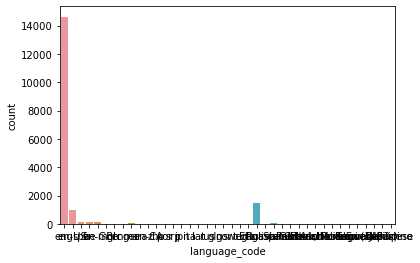

In [153]:
sns.countplot(rez.language_code)

In [154]:
rez.language_code.value_counts()

eng                      14622
English                   1477
en-US                     1006
spa                        149
en-GB                      137
fre                        107
ger                         68
Unavailable                 61
French                      19
mul                         16
Arabic                      14
jpn                         12
German                      11
Spanish                     11
Indonesian                   7
grc                          7
en-CA                        5
zho                          5
Italian                      5
por                          4
Portuguese                   3
enm                          3
ita                          3
Polish                       3
Filipino; Pilipino           2
lat                          2
rus                          2
Kannada                      2
Japanese                     1
swe                          1
srp                          1
nor                          1
gla     

In [155]:

rez=rez[(rez['language_code']=="eng") | (rez['language_code']=='English')|(rez['language_code']=='en-US')|(rez['language_code']=='en-GB')|(rez['language_code']=='en-CA')]

We are keeping only English books that way we can remove the language-code column and keeping entries of other languages will not only make it complicated but being in a different language means it we cannot find similar books using language.

In [156]:
rez.drop(['language_code'],axis=1,inplace=True)

In [157]:
def clean_author(author):
    if "/"in author:
        return author.split("/")[0]
    else:
        return author
    

In [158]:
rez['author']=rez.author.apply(lambda x : clean_author(x))

In [159]:
rez.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17247 entries, 0 to 8367
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             17247 non-null  int64  
 1   title               17247 non-null  object 
 2   author              17247 non-null  object 
 3   rating              17247 non-null  float64
 4   num_pages           17247 non-null  float64
 5   number_of_ratings   17247 non-null  int64  
 6   text_reviews_count  17247 non-null  object 
 7   year                17235 non-null  object 
 8   publisher           17247 non-null  object 
 9   description         17247 non-null  object 
 10  awards              17247 non-null  object 
 11  genre               17247 non-null  object 
 12  Movie               17247 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.8+ MB


In [160]:
rez['genre']=rez['genre'].replace({'Childrens': 'children',
                  'Historical': 'history_biography',
                  'History': 'history_biography',
                  'Fantasy': 'fantasy_paranormal_fiction',
                  'Fiction': 'fantasy_paranormal_fiction',
                  'Horror': 'mystery_thriller_crime',
                  'Mystery': 'mystery_thriller_crime',
                  'Nonfiction': 'history_biography',
                  'fantasy_paranormal': 'fantasy_paranormal_fiction',
                  'Philosophy': 'poetry_philosophy',
                  'poetry': 'poetry_philosophy',
                  'Romance': 'romance',
                 'Science Fiction': 'fantasy_paranormal_fiction',
                 'Sequential Art': 'comics',
                 'Young Adult': 'young_adult'})

As the genre in UCSD and GoodReads are different so we will rename the genres in GoodReads to match the genres in UCSD to make the formatting constant .

[Text(0, 0, 'fantasy_paranormal_fiction'),
 Text(1, 0, 'not_given'),
 Text(2, 0, 'history_biography'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'young_adult'),
 Text(5, 0, 'romance'),
 Text(6, 0, 'mystery_thriller_crime'),
 Text(7, 0, 'Classics'),
 Text(8, 0, 'children'),
 Text(9, 0, 'poetry_philosophy'),
 Text(10, 0, 'comics')]

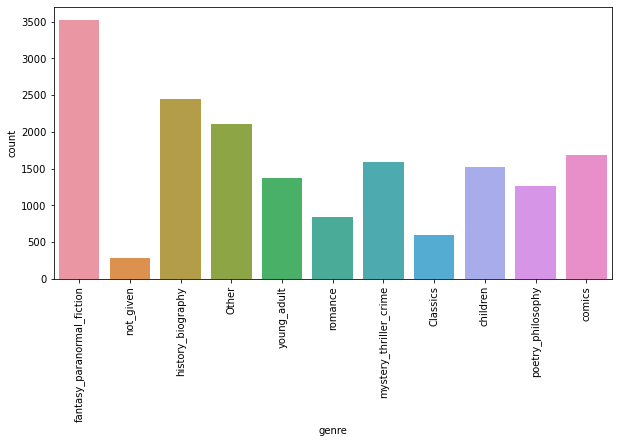

In [161]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=rez,
    x='genre',  
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [166]:
rez.head(2)

,book_id,title,author,rating,num_pages,number_of_ratings,text_reviews_count,publisher,description,awards,genre,Movie,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652,2095690,27591,Scholastic Inc.,The war against Voldemort is not going well; e...,3,fantasy_paranormal_fiction,yes,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,870,2153167,29221,Scholastic Inc.,There is a door at the end of a silent corrido...,9,fantasy_paranormal_fiction,yes,2004


In [95]:
def clean_title(title):
    if " " not in title:
        book=re.sub(r"(\w)([A-Z])", r"\1 \2", title)
        return book
    else:
        return title
rez['title']=rez['title'].apply(lambda x : clean_title(x))

Some Title name had no spaces between the words and the wrds were in camel case , we have to put a space between them to make the formatting constant.


In [97]:
print(rez['year'][0])
print(rez['year'][8000])
print(rez['year'][17000])

9/16/2006
January9th2007
2016.0


The year column is not formatted constantly, so we have to fix that, we are using only the year the book was published.

In [98]:
def get_year(date):
    try:
        if len(date)>6:
            return date[-4:]
        elif len(date)==4:
            return date
        elif "-" in date:
            return date.split("-")[1]
        else:
            return date[:-2]
    except Exception as e:
        pass
def clean_year(year):
    try:
        if((int(year)<1000) and (int(year)>0)):
            return 1900+int(year)
        else: 
            return int(year)
    except Exception as e:
        pass
        return 0
rez['year_clean']=rez['year'].apply( lambda x : get_year(x))
rez['year_clean']=rez['year_clean'].apply( lambda x : clean_year(x))

In [102]:
rez.dropna(inplace=True)

In [103]:
rez.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17235 entries, 0 to 17246
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             17235 non-null  int64  
 1   title               17235 non-null  object 
 2   author              17235 non-null  object 
 3   rating              17235 non-null  float64
 4   num_pages           17235 non-null  float64
 5   number_of_ratings   17235 non-null  int64  
 6   text_reviews_count  17235 non-null  object 
 7   year                17235 non-null  object 
 8   publisher           17235 non-null  object 
 9   description         17235 non-null  object 
 10  awards              17235 non-null  object 
 11  genre               17235 non-null  object 
 12  Movie               17235 non-null  object 
 13  year_clean          17235 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 2.0+ MB


In [107]:
rez.head()

,book_id,title,author,rating,num_pages,number_of_ratings,text_reviews_count,year,publisher,description,awards,genre,Movie,year_clean
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652.0,2095690,27591,9/16/2006,Scholastic Inc.,The war against Voldemort is not going well; e...,3.0,fantasy_paranormal_fiction,yes,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,870.0,2153167,29221,9/1/2004,Scholastic Inc.,There is a door at the end of a silent corrido...,9.0,fantasy_paranormal_fiction,no,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352.0,6333,244,11/1/2003,Scholastic,The Dursleys were so mean and hideous that sum...,7.0,fantasy_paranormal_fiction,no,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,435.0,2339585,36325,5/1/2004,Scholastic Inc.,Harry Potter's third year at Hogwarts is full ...,13.0,fantasy_paranormal_fiction,no,2004
4,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,152.0,19,1,4/26/2005,Nimble Books,Through the magic of print-on-demand technolog...,0.0,not_given,no,2005


The dataset seems to be clean right now, with no null values, we are going to use this dataset for our Data Analysis and the recommender system and Classification. we are saving the data frame in Poject_data.csv.

In [105]:
#rez.to_csv('data/Poject_data.csv')